# AIT526 Individual Lab 2

In [199]:
from bs4 import BeautifulSoup
import requests

## Task 1 - Text Summarization with Word Frequencies 

In [200]:
# 1.1 - Web Scraping Technique
def get_content_from_page(url):
    
    final_page_text = ""
    
    page_response = requests.get(url)
    soup_response = BeautifulSoup(page_response.content, "lxml")
    final_content = soup_response.find(id="content")
    pars = final_content.find_all("p")
    
    for p in pars:
        final_page_text += p.text
        
    return final_page_text.lower()

URL = 'https://en.wikipedia.org/wiki/Natural_language_processing'
content = get_content_from_page(URL)
content

'natural language processing (nlp) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  the goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nchallenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.\nnatural language processing has its roots in the 1950s. already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence, though at the time t

In [201]:
# 1.2

from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

# Tokenization

# Sentence Tokenizer
my_sentences = sent_tokenize(content)
print('The no of sentences are: ', len(my_sentences), '\n')

# Word Tokenizer
my_words = word_tokenize(content)
print('Total Number of Words: ', len(my_words))
print(my_words[:20], '\n')

my_punct_tokenize = wordpunct_tokenize(content)
print('Total Number of Words: ', len(my_punct_tokenize))
print(my_punct_tokenize[:20], '\n')


# Removing punctuation
words_without_punctuation = []

words_without_punctuation = [''.join(eachcharac for eachcharac in eachword if eachcharac not in string.punctuation ) for eachword in my_punct_tokenize]

final_words_without_punct = [eachw.lower() for eachw in words_without_punctuation if eachw!='']

print("The no of words after removing punctuation are: ",len(final_words_without_punct))
print("The first 20 words are: \n", final_words_without_punct[:20], '\n')



# Removing stop words
stop_words = set(stopwords.words('english'))
without_stop_words = []

for i in final_words_without_punct:
    if i not in stop_words:
        without_stop_words.append(i)
    
		
print('No of words without any stopwords: ', len(without_stop_words), '\n')
print("The first 20 words are: \n", without_stop_words[:20], '\n')

The no of sentences are:  50 

Total Number of Words:  1520
['natural', 'language', 'processing', '(', 'nlp', ')', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned'] 

Total Number of Words:  1594
['natural', 'language', 'processing', '(', 'nlp', ')', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned'] 

The no of words after removing punctuation are:  1340
The first 20 words are: 
 ['natural', 'language', 'processing', 'nlp', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between'] 

No of words without any stopwords:  862 

The first 20 words are: 
 ['natural', 'language', 'processing', 'nlp', 'interdisciplinary', 'subfield', 'linguistics', 'computer', 'science', 'artifi

In [202]:
# 1.3

def calc_word_freq(input_words):
    
    # to calculate word frequency 
    word_freq_list = FreqDist(input_words)
    
    # finding the max freq
    maximum_cnt = word_freq_list.most_common(1)[0][1]
    
    # weighted freqencies
    for each_word in word_freq_list.keys():
        word_freq_list[each_word] = word_freq_list[each_word] / maximum_cnt
    return word_freq_list

freq_of_words = calc_word_freq(without_stop_words)
print(freq_of_words.most_common(20))

[('language', 1.0), ('natural', 0.7142857142857143), ('nlp', 0.6071428571428571), ('processing', 0.5714285714285714), ('machine', 0.4642857142857143), ('learning', 0.4642857142857143), ('cognitive', 0.4642857142857143), ('statistical', 0.42857142857142855), ('e', 0.35714285714285715), ('tasks', 0.35714285714285715), ('linguistics', 0.32142857142857145), ('rules', 0.32142857142857145), ('g', 0.32142857142857145), ('models', 0.32142857142857145), ('neural', 0.2857142857142857), ('based', 0.25), ('systems', 0.21428571428571427), ('algorithms', 0.21428571428571427), ('methods', 0.21428571428571427), ('many', 0.21428571428571427)]


In [203]:
# 1.4 
import operator
sent_freq_dict = {}

# calculating the frequency for each sentence based on the individual word frequency
for each_sentence in my_sentences:
    each_sentence = each_sentence.lower()
    word_list = wordpunct_tokenize(each_sentence)
    sum = 0
    for each_word in word_list:
        sum = sum + freq_of_words[each_word]
    #print(each_sentence, sum)
    sent_freq_dict[each_sentence] = sum
    
# sorting the dictionary in descending order
ranked_sent = dict(sorted(sent_freq_dict.items(), key=operator.itemgetter(1), reverse=True))
ranked_sent

{'more recent systems based on machine-learning algorithms have many advantages over hand-produced rules: \ndespite the popularity of machine learning in nlp research, symbolic methods are still (2020) commonly used:\nsince the so-called "statistical revolution"[16][17] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning.': 9.607142857142856,
 'as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[45] with two defining aspects:\nties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s.': 7.499999999999997,
 'natural language processing (nlp) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between c

In [204]:
# 1.5 - Summary 


def summary_based_on_sent_count(how_many_sent):
    return list(ranked_sent)[:how_many_sent]
    # Returning the first n sentences of the sorted sentence list 
    # which were sorted in the descending order based on the freq

    
def summary_based_word_count(word_count):
    res = ""
    s_index = 0
    w_index = 0
    w_count = 0
    s_words = []
    spc = ""
    new_ln = ""
    sents = list(ranked_sent)
    
    while w_count < word_count: # reading a new sent and tokenizing it
        if len(s_words) == 0:
            s_words = wordpunct_tokenize(sents[s_index])
            w_index = 0
            spc = ""
            if len(res)>0:
                new_ln = "\n"
        if w_index<len(s_words):
            res += new_ln + spc + s_words[w_index]
            w_index += 1
            w_count += 1
            spc = " "
            new_ln = ""
        else:
            s_words = [] # reading another sentence now
            s_index += 1
    return res


def summary_based_on_percent(percent):
    
    w_count = 0
    tot_words = len(my_words)
    w_count = (percent/100)*tot_words
    return summary_based_word_count(w_count)

print('Summary based on sentence count: \n')
print(summary_based_on_sent_count(2))

print('\n\nSummary based on word count: \n')
print(summary_based_word_count(100))

print('\n\nSummary based on Percentage: \n')
print(summary_based_on_percent(15))

Summary based on sentence count: 

['more recent systems based on machine-learning algorithms have many advantages over hand-produced rules: \ndespite the popularity of machine learning in nlp research, symbolic methods are still (2020) commonly used:\nsince the so-called "statistical revolution"[16][17] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning.', 'as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[45] with two defining aspects:\nties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s.']


Summary based on word count: 

more recent systems based on machine - learning algorithms have many advantages over hand - produced rules : despite the popularity of machine 

## Task 2 - Text Summarization with N-grams

In [205]:
from nltk.util import ngrams

In [206]:
# 2.1 Generating n-grams from the text
def gen_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text.lower()), n)
    return [' '.join(g) for g in n_grams]


grams_res_2 = gen_ngrams(content, 2)
print('bi-grams: \n', grams_res_2[0:20], '\n')

grams_res_3 = gen_ngrams(content, 3)
print('tri-grams: \n', grams_res_3[0:20], '\n')

grams_res_4 = gen_ngrams(content, 4)
print('4-grams: \n', grams_res_4[0:20], '\n')

bi-grams: 
 ['natural language', 'language processing', 'processing (', '( nlp', 'nlp )', ') is', 'is an', 'an interdisciplinary', 'interdisciplinary subfield', 'subfield of', 'of linguistics', 'linguistics ,', ', computer', 'computer science', 'science ,', ', and', 'and artificial', 'artificial intelligence', 'intelligence concerned', 'concerned with'] 

tri-grams: 
 ['natural language processing', 'language processing (', 'processing ( nlp', '( nlp )', 'nlp ) is', ') is an', 'is an interdisciplinary', 'an interdisciplinary subfield', 'interdisciplinary subfield of', 'subfield of linguistics', 'of linguistics ,', 'linguistics , computer', ', computer science', 'computer science ,', 'science , and', ', and artificial', 'and artificial intelligence', 'artificial intelligence concerned', 'intelligence concerned with', 'concerned with the'] 

4-grams: 
 ['natural language processing (', 'language processing ( nlp', 'processing ( nlp )', '( nlp ) is', 'nlp ) is an', ') is an interdisciplin

<FreqDist with 1434 samples and 1518 outcomes>
[('natural language processing', 12), ('language processing .', 5), ('in natural language', 4), ('( e.g. ,', 4), ('of natural language', 3), (', however ,', 3), ('] in the', 3), (', e.g. ,', 3), ('grammar , [', 3), ('language processing (', 2), ('processing ( nlp', 2), ('( nlp )', 2), ('is an interdisciplinary', 2), ('of linguistics ,', 2), ('data . the', 2), ('of documents ,', 2), ('natural language .', 2), ('of symbolic nlp', 2), ('hand-written rules .', 2), ('in the late', 2)]


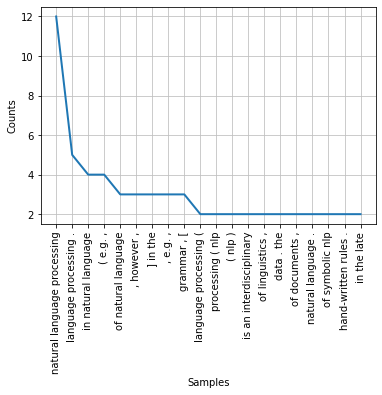

In [207]:
# 2.2

import matplotlib.pyplot as plt

# a) freq dist to calculate the n-gram frequencies
def display_n_grams(n):
    n_grams = gen_ngrams(content, n)
    freq_grams_res = FreqDist(n_grams)
    print(freq_grams_res)
    print(freq_grams_res.most_common(20))
    freq_grams_res.plot(20)
    plt.show()
    
display_n_grams(3)

In [211]:
# 2.2 b 

n_grams = 3

ngram_freq = FreqDist(gen_ngrams(content, n_grams))
sent_score = {}
maximum_cnt = ngram_freq.most_common(1)[0][1]
for each_word in ngram_freq.keys():
    ngram_freq[each_word] = ngram_freq[each_word] / maximum_cnt
        
        
print(ngrams_freq_res.items())

dict_items([('natural language processing', 1.0), ('language processing (', 0.16666666666666666), ('processing ( nlp', 0.16666666666666666), ('( nlp )', 0.16666666666666666), ('nlp ) is', 0.08333333333333333), (') is an', 0.08333333333333333), ('is an interdisciplinary', 0.16666666666666666), ('an interdisciplinary subfield', 0.08333333333333333), ('interdisciplinary subfield of', 0.08333333333333333), ('subfield of linguistics', 0.08333333333333333), ('of linguistics ,', 0.16666666666666666), ('linguistics , computer', 0.08333333333333333), (', computer science', 0.08333333333333333), ('computer science ,', 0.08333333333333333), ('science , and', 0.08333333333333333), (', and artificial', 0.08333333333333333), ('and artificial intelligence', 0.08333333333333333), ('artificial intelligence concerned', 0.08333333333333333), ('intelligence concerned with', 0.08333333333333333), ('concerned with the', 0.08333333333333333), ('with the interactions', 0.08333333333333333), ('the interactions

In [ ]:
# 2.2 c - Calculating the senetence scores
def calc_sent_scores_ngrams(sent_tokens, ngram_freq, n_grams):
    
    sent_score = {}
    maximum_cnt = ngram_freq.most_common(1)[0][1]
    for each_word in ngram_freq.keys():
        ngram_freq[each_word] = ngram_freq[each_word] / maximum_cnt
    
    for eachsentence in sent_tokens:
        sum = 0
        sent_n_grams = gen_ngrams(eachsentence.lower(), n_grams)
        for each_sent_ngram in sent_n_grams:
            sum = sum + ngram_freq[each_sent_ngram]
            sent_score[eachsentence] = sum
    
    # ranked_sent = dict(sorted(sent_score.items(), key=operator.itemgetter(1), reverse=True))
    return sent_score        
        

    
    
n_grams = 3
ngram_freq = FreqDist(gen_ngrams(content, n_grams))
sent_score = calc_sent_scores_ngrams(my_sentences, ngram_freq, n_grams)
sent_score

In [ ]:
# 2.2 d

from heapq import nlargest
def n_gram_summary_based_on_sent_count(n_grams, sent_count):
    ngrams_frequency = FreqDist(gen_ngrams(content, n_grams))
    sent_scores = calc_sent_scores_ngrams(my_sentences, ngrams_frequency, n_grams)
    sent_summary = nlargest(sent_count, sent_scores, key=sent_scores.get)
    final_res = " ".join(sent_summary)
    return final_res
    
print(n_gram_summary_based_on_sent_count(3,3))


## Task 3 - Comparison

In the first task, we divided the sentences word by word and found out which sentence had the highest score based on their weighted frequencies. 

In the second task, we split the sentences into two or more words and then found out which one occurred the most based on their frequencies. 

The second task produced more meaningful and trustworthy results as we have the chance to consider phrases instead of just using a single word. For example, the phrase 'natural processing language' has a higher probability of appearing together as it is a more coherent and also commonly used phrase. Whereas the individual words - natural, processing and language would mean differently in different contexts. 


#### 115 words